In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from google.colab import drive

drive.mount('/content/drive')

# import data from csv
df = pd.read_csv('/content/drive/My Drive/Bellevue University/DSC410 Predictive Analytics/travel_insurance.csv')


Mounted at /content/drive


In [ ]:
# view raw data
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41
...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63


In [ ]:
# check initial column data types
df.dtypes

Agency                   object
Agency Type              object
Distribution Channel     object
Product Name             object
Claim                    object
Duration                  int64
Destination              object
Net Sales               float64
Commision (in value)    float64
Gender                   object
Age                       int64
dtype: object

In [ ]:
# check for missing values
df.isna().sum()

Agency                      0
Agency Type                 0
Distribution Channel        0
Product Name                0
Claim                       0
Duration                    0
Destination                 0
Net Sales                   0
Commision (in value)        0
Gender                  45107
Age                         0
dtype: int64

Per the above code, it appears the Gender column is missing data in approx. 70% of the fields. Because of this, I deem the column irrelevant to our model and will remove it completely.

In [ ]:
# drop Gender column
df = df.drop(columns=['Gender'])
df

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,63


Now I will rename the column headers to be more palatable.

In [ ]:
# rename columns
df = df.rename(columns={"Agency": "agency",
                   "Agency Type": "agency_type",
                   "Distribution Channel": "distribution_channel",
                   "Product Name": "product_name",
                   "Claim": "claim",
                   "Duration": "duration",
                   "Destination": "destination",
                   "Net Sales": "net_sales",
                   "Commision (in value)": "commission_in_value",
                   "Age": "age"})
df.head()

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commission_in_value,age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,41


As the first part of my EDA, I'm going to do some basic plots to attempt to better understand what the key features are.

(array([8.0000e+00, 8.0000e+00, 1.1000e+01, 1.7000e+01, 2.8000e+01,
        5.7000e+01, 3.2200e+02, 1.3730e+03, 2.4010e+03, 3.5430e+03,
        5.0860e+03, 4.4910e+03, 2.6038e+04, 2.5470e+03, 2.4000e+03,
        2.3560e+03, 3.6550e+03, 1.8100e+03, 1.5760e+03, 1.0070e+03,
        1.1180e+03, 7.9700e+02, 6.0300e+02, 4.3900e+02, 2.8800e+02,
        1.4600e+02, 9.3000e+01, 6.1000e+01, 4.7000e+01, 1.6000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 9.8400e+02]),
 array([  0.  ,   2.95,   5.9 ,   8.85,  11.8 ,  14.75,  17.7 ,  20.65,
         23.6 ,  26.55,  29.5 ,  32.45,  35.4 ,  38.35,  41.3 ,  44.25,
         47.2 ,  50.15,  53.1 ,  56.05,  59.  ,  61.95,  64.9 ,  67.85,
         70.8 ,  73.75,  76.7 ,  79.65,  82.6 ,  85.55,  88.5 ,  91.45,
         94.4 ,  97.35, 100.3 , 103.25, 106.2 , 109.15, 112.1 , 115.05,
        118.  ]),
 <BarContainer object of 40 artists>)

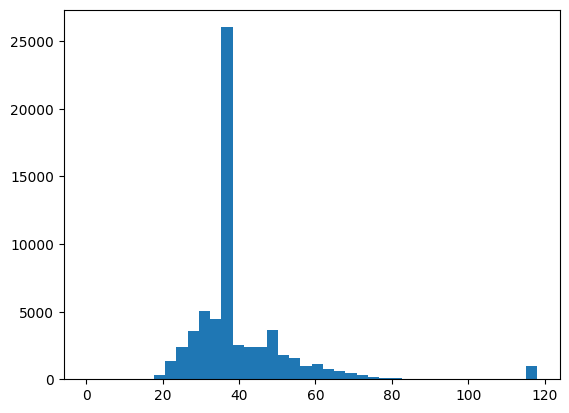

In [ ]:
plt.hist(df['age'], bins=40)

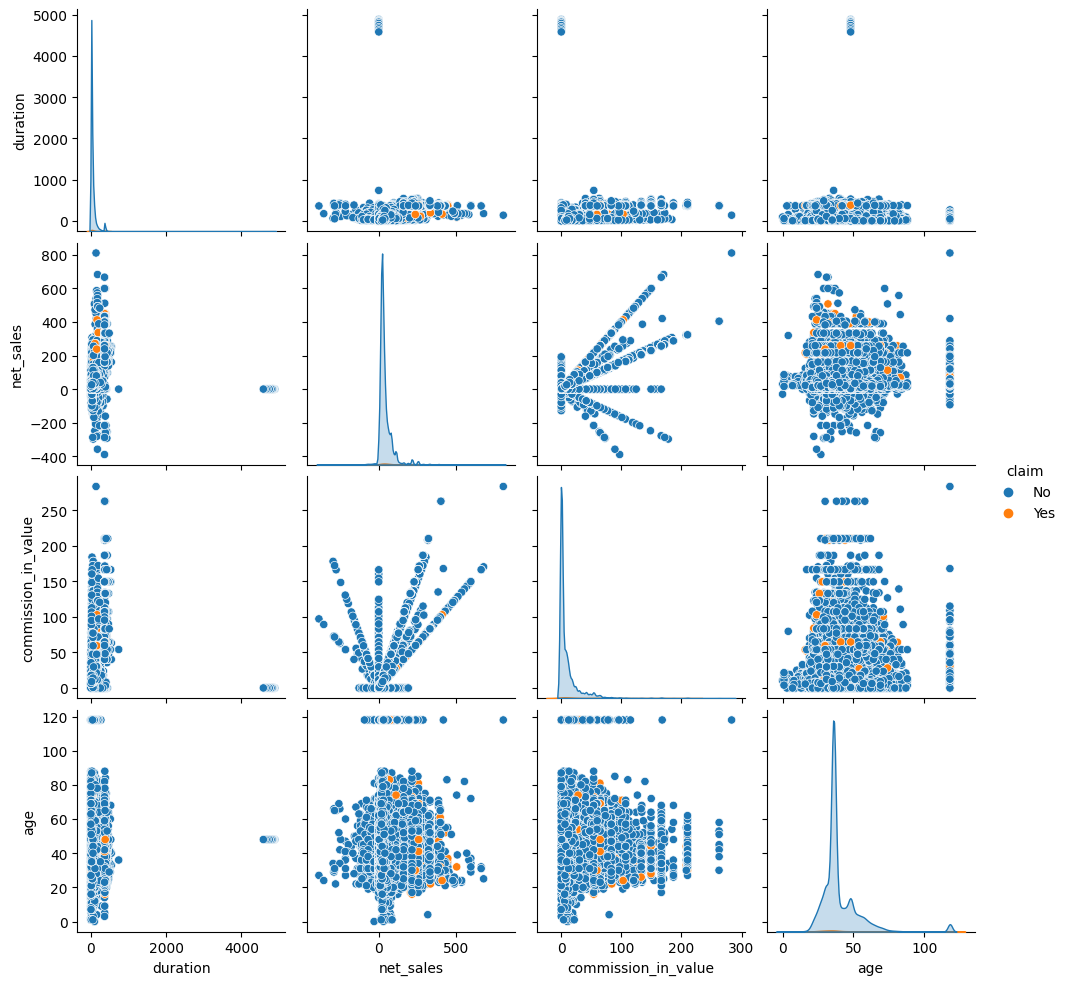

In [ ]:
sns.pairplot(df, hue='claim')

It appears the majority of fliers are between the 30-40 age. Additionally, there is are outliers that need to be handled since the presumption is there aren't fliers that are over the age of 110 flying.

In [ ]:
df.age.unique()

array([ 81,  71,  32,  41,  44,  29,  37, 118,  47,  48,  64,  36,  53,
        43,  58,  25,  34,  26,  30,  33,  35,  31,  61,  20,  46,  49,
        50,  62,  65,  24,  40,  21,  66,  57,  45,  52,  60,  27,  23,
        39,  59,  28,  67,  38,  72,  51,  55,  54,  69,  22,  78,  42,
        70,  68,  77,  63,  56,  79,  76,  16,  14,  73,  18,  19,  74,
        85,  84,  13,  75,  87,  80,  83,  12,  10,   8,  17,  15,   9,
        11,  86,   3,  82,   1,   5,  88,   2,   4,   0,   7])

In [ ]:
#print(df[df.age == 118])
df['age'].value_counts()[118]

984

As seen above, it appears there are 984 rows in our data where the age is listed as 118. In order to keep the data, I'm going to assume that was mistyped during entry and will change the value to '18'.

In [ ]:
df = df.replace({'age': {118: 18}})
print(df[df.age == 118]) # should return empty frame if replace was successful

Empty DataFrame
Columns: [agency, agency_type, distribution_channel, product_name, claim, duration, destination, net_sales, commission_in_value, age]
Index: []


In [ ]:
df.duration.unique()

array([ 186,   65,   60,   79,   66,   47,   63,   57,   33,    1,   53,
          5,   39,    6,   48,   11,    3,   14,  136,   12,    7,  190,
        364,   29,   28,  153,    4,   54,   24,    9,   45,   35,    8,
        183,   36,   38,   13,   27,   16,   19,   18,  189,  105,   23,
         15,  180,   90,   91,    2,   17,   10,  279,   92,   22,   64,
         37,   31,   41,  126,   50,   55,  181,   76,   43,   56,   20,
        164,   26,  152,   30,   32,  111,   34,  201,   62,   81,   42,
         49,  124,  118,   52,   59,   73,   21,   25,   94,   46,   82,
         40,  130,  388,  369,  368,  114,   85,  133,  103,  110,  147,
        306,   75,   83,   70,  104,  131,  202,  179,   61,  365,  374,
        386,   86,  100,  244,   99,  108,  277,  107,   87,  276,  123,
        122,  148,  278,  204,  112,   78,   97,  142,  351,   68,  163,
        197,   95,  125,   51,   69,   44,   71,   72,  178,   80,  150,
         74,  171,  127,  160,  168,  158,  325,  1

In reviewing the unique values for the duration column, it appears there are outliers here as well that appear to be miskeys during the data entry. Assuming the field represents minutes, the assumption can be made that no travel is taking 4000+ minutes (60+ hours) to complete since that is impossible. I will be correcting this by dividing those values by 10 with the assumption that the starting number of '4' is correct.

There are also values that are very low and even negative in a few instances. I will assume that since this appears to be for flight travel insurance, that the shortest duration (in minutes) a flight would ever take is 30 minutes so I will update all those values less than 30 to 30.

In [ ]:
a = np.array(df['duration'].values.tolist())
df['duration'] = np.where(a > 1000, a/10, a).tolist()

b = np.array(df['duration'].values.tolist())
df['duration'] = np.where(b < 30, 30, b).tolist()

df.duration.unique()

array([186. ,  65. ,  60. ,  79. ,  66. ,  47. ,  63. ,  57. ,  33. ,
        30. ,  53. ,  39. ,  48. , 136. , 190. , 364. , 153. ,  54. ,
        45. ,  35. , 183. ,  36. ,  38. , 189. , 105. , 180. ,  90. ,
        91. , 279. ,  92. ,  64. ,  37. ,  31. ,  41. , 126. ,  50. ,
        55. , 181. ,  76. ,  43. ,  56. , 164. , 152. ,  32. , 111. ,
        34. , 201. ,  62. ,  81. ,  42. ,  49. , 124. , 118. ,  52. ,
        59. ,  73. ,  94. ,  46. ,  82. ,  40. , 130. , 388. , 369. ,
       368. , 114. ,  85. , 133. , 103. , 110. , 147. , 306. ,  75. ,
        83. ,  70. , 104. , 131. , 202. , 179. ,  61. , 365. , 374. ,
       386. ,  86. , 100. , 244. ,  99. , 108. , 277. , 107. ,  87. ,
       276. , 123. , 122. , 148. , 278. , 204. , 112. ,  78. ,  97. ,
       142. , 351. ,  68. , 163. , 197. ,  95. , 125. ,  51. ,  69. ,
        44. ,  71. ,  72. , 178. ,  80. , 150. ,  74. , 171. , 127. ,
       160. , 168. , 158. , 325. , 116. , 215. , 149. , 212. , 282. ,
       174. , 155. ,

Now I will review all of the columns with categorical data to see what type of transformation will be needed, if any, to make them fit for the model.

In [ ]:
df.agency.unique()

array(['CBH', 'CWT', 'JZI', 'KML', 'EPX', 'C2B', 'JWT', 'RAB', 'SSI',
       'ART', 'CSR', 'CCR', 'ADM', 'LWC', 'TTW', 'TST'], dtype=object)

In [ ]:
df.dtypes

agency                   object
agency_type              object
distribution_channel     object
product_name             object
claim                    object
duration                float64
destination              object
net_sales               float64
commission_in_value     float64
age                       int64
dtype: object

In [ ]:
df.agency_type.unique()

array(['Travel Agency', 'Airlines'], dtype=object)

In [ ]:
df.distribution_channel.unique()

array(['Offline', 'Online'], dtype=object)

In [ ]:
df.product_name.unique()

array(['Comprehensive Plan', 'Rental Vehicle Excess Insurance',
       'Value Plan', 'Basic Plan', 'Premier Plan',
       '2 way Comprehensive Plan', 'Bronze Plan', 'Silver Plan',
       'Annual Silver Plan', 'Cancellation Plan',
       '1 way Comprehensive Plan', 'Ticket Protector', '24 Protect',
       'Gold Plan', 'Annual Gold Plan',
       'Single Trip Travel Protect Silver',
       'Individual Comprehensive Plan',
       'Spouse or Parents Comprehensive Plan',
       'Annual Travel Protect Silver',
       'Single Trip Travel Protect Platinum',
       'Annual Travel Protect Gold', 'Single Trip Travel Protect Gold',
       'Annual Travel Protect Platinum', 'Child Comprehensive Plan',
       'Travel Cruise Protect', 'Travel Cruise Protect Family'],
      dtype=object)

In [ ]:
df.claim.unique()

array(['No', 'Yes'], dtype=object)

In [ ]:
df.destination.unique()

array(['MALAYSIA', 'AUSTRALIA', 'ITALY', 'UNITED STATES', 'THAILAND',
       "KOREA, DEMOCRATIC PEOPLE'S REPUBLIC OF", 'NORWAY', 'VIET NAM',
       'DENMARK', 'SINGAPORE', 'JAPAN', 'UNITED KINGDOM', 'INDONESIA',
       'INDIA', 'CHINA', 'FRANCE', 'TAIWAN, PROVINCE OF CHINA',
       'PHILIPPINES', 'MYANMAR', 'HONG KONG', 'KOREA, REPUBLIC OF',
       'UNITED ARAB EMIRATES', 'NAMIBIA', 'NEW ZEALAND', 'COSTA RICA',
       'BRUNEI DARUSSALAM', 'POLAND', 'SPAIN', 'CZECH REPUBLIC',
       'GERMANY', 'SRI LANKA', 'CAMBODIA', 'AUSTRIA', 'SOUTH AFRICA',
       'TANZANIA, UNITED REPUBLIC OF', "LAO PEOPLE'S DEMOCRATIC REPUBLIC",
       'NEPAL', 'NETHERLANDS', 'MACAO', 'CROATIA', 'FINLAND', 'CANADA',
       'TUNISIA', 'RUSSIAN FEDERATION', 'GREECE', 'BELGIUM', 'IRELAND',
       'SWITZERLAND', 'CHILE', 'ISRAEL', 'BANGLADESH', 'ICELAND',
       'PORTUGAL', 'ROMANIA', 'KENYA', 'GEORGIA', 'TURKEY', 'SWEDEN',
       'MALDIVES', 'ESTONIA', 'SAUDI ARABIA', 'PAKISTAN', 'QATAR', 'PERU',
       'LUXEMBOURG',

I'll first handle our target column claim by converting the Yes/No string variables with 1 or 0 ints respectively.

In [ ]:
# convert target column 'claim' to be binary ints to represent the Yes/No
df['claim'] = df['claim'].map({'Yes': 1, 'No': 0})
df

,agency,agency_type,distribution_channel,product_name,claim,duration,destination,net_sales,commission_in_value,age
0,CBH,Travel Agency,Offline,Comprehensive Plan,0,186.0,MALAYSIA,-29.0,9.57,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,0,186.0,MALAYSIA,-29.0,9.57,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,65.0,AUSTRALIA,-49.5,29.70,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,60.0,AUSTRALIA,-39.6,23.76,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,0,79.0,ITALY,-19.8,11.88,41
...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Airlines,Online,Basic Plan,0,111.0,JAPAN,35.0,12.25,31
63322,JZI,Airlines,Online,Basic Plan,0,58.0,CHINA,40.0,14.00,40
63323,JZI,Airlines,Online,Basic Plan,0,30.0,MALAYSIA,18.0,6.30,57
63324,JZI,Airlines,Online,Basic Plan,0,30.0,VIET NAM,18.0,6.30,63


I will now complete one-hot encoding on the agency_type and distribution_channel columns as there are only two variables within each.

In [ ]:
# one hot encoding using get_dummies()
df = pd.get_dummies(df, columns = ['agency_type', 'distribution_channel'])
df = df.rename(columns={"agency_type_Travel Agency": "agency_type_Travel_Agency"})
df

,agency,product_name,claim,duration,destination,net_sales,commission_in_value,age,agency_type_Airlines,agency_type_Travel_Agency,distribution_channel_Offline,distribution_channel_Online
0,CBH,Comprehensive Plan,0,186.0,MALAYSIA,-29.0,9.57,81,0,1,1,0
1,CBH,Comprehensive Plan,0,186.0,MALAYSIA,-29.0,9.57,71,0,1,1,0
2,CWT,Rental Vehicle Excess Insurance,0,65.0,AUSTRALIA,-49.5,29.70,32,0,1,0,1
3,CWT,Rental Vehicle Excess Insurance,0,60.0,AUSTRALIA,-39.6,23.76,32,0,1,0,1
4,CWT,Rental Vehicle Excess Insurance,0,79.0,ITALY,-19.8,11.88,41,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
63321,JZI,Basic Plan,0,111.0,JAPAN,35.0,12.25,31,1,0,0,1
63322,JZI,Basic Plan,0,58.0,CHINA,40.0,14.00,40,1,0,0,1
63323,JZI,Basic Plan,0,30.0,MALAYSIA,18.0,6.30,57,1,0,0,1
63324,JZI,Basic Plan,0,30.0,VIET NAM,18.0,6.30,63,1,0,0,1


Now for the agency, agency_type, product_name, and destination columns I will perform frequency encoding to replace their values with numerical values based on how frequent they appear within the column. This will allow us to use the values in our model while avoiding one-hot encoding since that would stretch our dataframe way too wide based on the number of unique values present in each.

In [ ]:
df = df.replace(df.agency.value_counts(normalize=True).to_dict())
df = df.replace(df.product_name.value_counts(normalize=True).to_dict())
df = df.replace(df.destination.value_counts(normalize=True).to_dict())
df

,agency,product_name,claim,duration,destination,net_sales,commission_in_value,age,agency_type_Airlines,agency_type_Travel_Agency,distribution_channel_Offline,distribution_channel_Online
0,0.001595,0.005748,0,186.0,0.093642,-29.0,9.57,81,0,1,1,0
1,0.001595,0.005748,0,186.0,0.093642,-29.0,9.57,71,0,1,1,0
2,0.135489,0.135489,0,65.0,0.058333,-49.5,29.70,32,0,1,0,1
3,0.135489,0.135489,0,60.0,0.058333,-39.6,23.76,32,0,1,0,1
4,0.135489,0.135489,0,79.0,0.007185,-19.8,11.88,41,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
63321,0.099943,0.086363,0,111.0,0.032546,35.0,12.25,31,1,0,0,1
63322,0.099943,0.086363,0,58.0,0.075735,40.0,14.00,40,1,0,0,1
63323,0.099943,0.086363,0,30.0,0.093642,18.0,6.30,57,1,0,0,1
63324,0.099943,0.086363,0,30.0,0.026356,18.0,6.30,63,1,0,0,1


Our columns all now appear to be fit to use for creating our first model!

<Axes: >

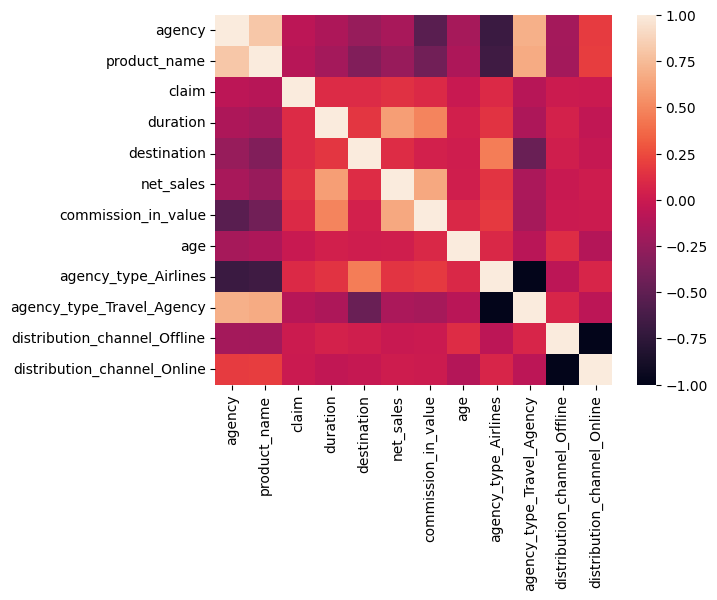

In [ ]:
sns.heatmap(df.corr())

In [ ]:
# define features and target

feature_columns = ['agency', 'product_name', 'duration', 'destination', 'net_sales', 'commission_in_value',
                   'age', 'agency_type_Airlines', 'agency_type_Travel_Agency', 'distribution_channel_Offline', 'distribution_channel_Online']
X = df[feature_columns] # features
y = df.claim # target

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, r2_score
import math

# create model variable and present RMSE and R2 Score

model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Root Mean Squared Error: %.2f" % (math.sqrt(mean_squared_error(y_test, y_pred))))
print("R2 Score: %.2f" % r2_score(y_test, y_pred))

Root Mean Squared Error: 0.12
R2 Score: -0.02


In [ ]:
# run confusion matrix in order to evaluate the performace of our model

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[12485,     1],
       [  180,     0]])

In [ ]:
target_names = ['1', '0']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

           1       0.99      1.00      0.99     12486
           0       0.00      0.00      0.00       180

    accuracy                           0.99     12666
   macro avg       0.49      0.50      0.50     12666
weighted avg       0.97      0.99      0.98     12666



In [ ]:
print("Model Score: %.3f" % model.score(X_test, y_test))

Model Score: 0.986


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, random_state=1, shuffle=True)

scores = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=kf, n_jobs=1)

print(f"Mean RMSE: {np.sqrt(np.mean(np.absolute(scores)))}")

Mean RMSE: 0.1215107455818882


As you can see above, the model score does very well even before any cross-fold validation.